In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("CocaCola_Sales_Rawdata_.csv")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
data.shape

(42, 2)

In [4]:
#names of dummy variables
quarter =['Q1','Q2','Q3','Q4'] 

In [5]:
p = data["Quarter"][0]
p[0:2]

'Q1'

In [6]:
data['quarter']= 0

In [7]:
for i in range(42):
    p = data["Quarter"][i]
    data['quarter'][i]= p[0:2]

<ipython-input-7-5838f5ca8d35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]= p[0:2]
C:\Users\AshishD7715\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
data.head(2)

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2


In [9]:
quarter_dummies = pd.DataFrame(pd.get_dummies(data['quarter']))

In [10]:
Coca_Cola = pd.concat([data,quarter_dummies],axis = 1)

In [11]:
Coca_Cola["t"] = np.arange(1,43)

In [12]:
Coca_Cola["t_squared"] = Coca_Cola["t"]*Coca_Cola["t"]

In [13]:
Coca_Cola["log_Sales"] = np.log(Coca_Cola["Sales"])

In [14]:
Coca_Cola.columns

Index(['Quarter', 'Sales', 'quarter', 'Q1', 'Q2', 'Q3', 'Q4', 't', 't_squared',
       'log_Sales'],
      dtype='object')

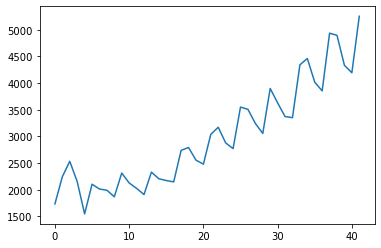

In [15]:
Coca_Cola.Sales.plot()

In [16]:
Train = Coca_Cola.head(39)

In [17]:
Test = Coca_Cola.head(7)

In [18]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

466.1355405232222

In [19]:
##################### Exponential ##############################

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

372.64409006963274

In [20]:
#################### Quadratic ###############################

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

306.37190979777654

In [21]:
################### Additive seasonality ########################

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea


864.9683519438438

In [22]:
################## Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

201.65269343179432

In [23]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

749.7213144182903

In [24]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

298.6112492073766

In [25]:
#Creating dataframe of all model rmse values
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,466.135541
1,rmse_Exp,372.644090
2,rmse_Quad,306.371910
3,rmse_add_sea,864.968352
4,rmse_add_sea_quad,201.652693
5,rmse_Mult_sea,749.721314
6,rmse_Mult_add_sea,298.611249


In [ ]:
# so rmse_add_sea_quad has the least value among the models prepared so far so we use this model for forecasting